In [29]:
import qiskit
import numpy as np # define random numbers
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import Aer
from qiskit import transpile
from qiskit.visualization import circuit_drawer, plot_bloch_multivector, plot_histogram
from qiskit.visualization import array_to_latex
from qiskit.quantum_info import random_statevector
#from qiskit.extensions import initialize
from math import pi, sqrt
import pylatexenc
from pylatexenc.latex2text import LatexNodes2Text
# import the following operator
from qiskit.quantum_info import Operator

In [30]:
def qft_rotations(circuit, n): # pass circuit and n qubits
    if n == 0:
        return circuit
    n -= 1 # since in python indices start from 0
    # apply hadamard gate
    circuit.h(n)
    for qubit in range(n):
        circuit.cp(pi/2**(n-qubit), qubit, n)
    qft_rotations(circuit, n)

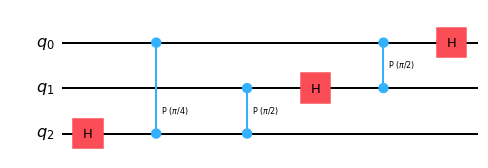

In [31]:
qc = QuantumCircuit(3)
qft_rotations(qc, 3)
qc.draw('mpl')

In [32]:
# apply swap register function as well
def swap_registers(circuit, n):
    for qubit in range(n //2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

In [33]:
def qft(circuit, n):
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit

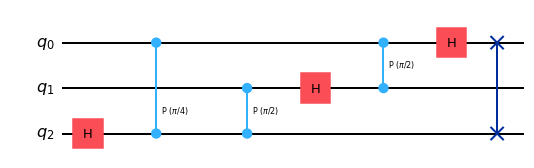

In [34]:
qc1 = QuantumCircuit(3) # here input is |000>
qft(qc1, 3)
qc1.draw('mpl')


Quantum state is:  Statevector([0.354+0.j, 0.354+0.j, 0.354+0.j, 0.354+0.j, 0.354+0.j,
             0.354+0.j, 0.354+0.j, 0.354+0.j],
            dims=(2, 2, 2))


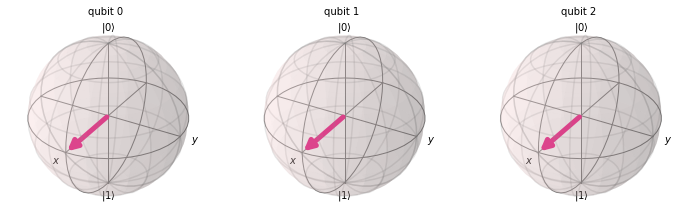

In [35]:
backend = Aer.get_backend('statevector_simulator')

#execute the circuit
qft_algo = transpile(qc1, backend)
job = backend.run(qft_algo)

#grab results from the job
result = job.result().get_statevector(qc1, decimals=3)

print("\nQuantum state is: ", result)

#plot a density matrix_plot
plot_bloch_multivector(result)

In [36]:
# QFT|000> = |+++>

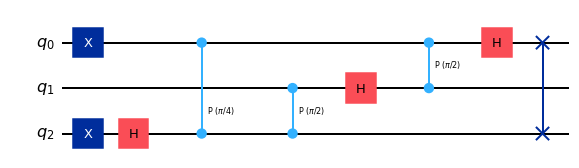

In [37]:
qc2 = QuantumCircuit(3) # here input is |101>
qc2.x(0)
qc2.x(2)
qft(qc2, 3)
qc2.draw('mpl')


Quantum state is:  Statevector([ 0.354-0.j   , -0.25 -0.25j ,  0.   +0.354j,  0.25 -0.25j ,
             -0.354+0.j   ,  0.25 +0.25j , -0.   -0.354j, -0.25 +0.25j ],
            dims=(2, 2, 2))


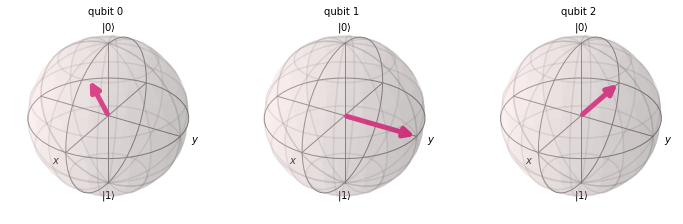

In [38]:
backend = Aer.get_backend('statevector_simulator')

#execute the circuit
qft_algo = transpile(qc2, backend)
job = backend.run(qft_algo)

#grab results from the job
result = job.result().get_statevector(qc2, decimals=3)

print("\nQuantum state is: ", result)

#plot a density matrix_plot
plot_bloch_multivector(result)

### Going from computational basis to the Fourier basis and vice versa we can use the inverse QFT

In [39]:
def inverse_qft(circuit, n):
    qft_circ = qft(QuantumCircuit(n), n)
    invqft_circ = qft_circ.inverse()
    circuit.append(invqft_circ, circuit.qubits[:n])
    return circuit.decompose()

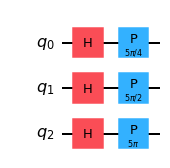

In [40]:
nqubits = 3
number = 5
qc3 = QuantumCircuit(nqubits)
for qubit in range(nqubits):
    qc3.h(qubit)
qc3.p(number*pi/4, 0)
qc3.p(number*pi/2, 1)
qc3.p(number*pi, 2)
qc3.draw('mpl')


Quantum state is:  Statevector([ 0.354+0.j   , -0.25 -0.25j ,  0.   +0.354j,  0.25 -0.25j ,
             -0.354-0.j   ,  0.25 +0.25j ,  0.   -0.354j, -0.25 +0.25j ],
            dims=(2, 2, 2))


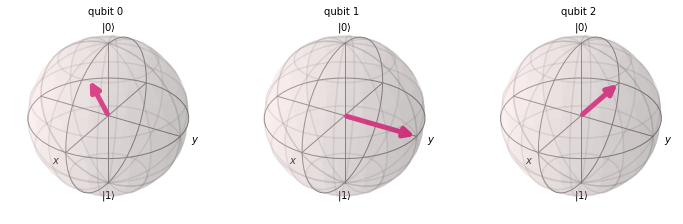

In [41]:
backend = Aer.get_backend('statevector_simulator')

#execute the circuit
qft_algo_reverse = transpile(qc3, backend)
job = backend.run(qft_algo_reverse)

#grab results from the job
result = job.result().get_statevector(qc3, decimals=3)

print("\nQuantum state is: ", result)

#plot a density matrix_plot
plot_bloch_multivector(result)

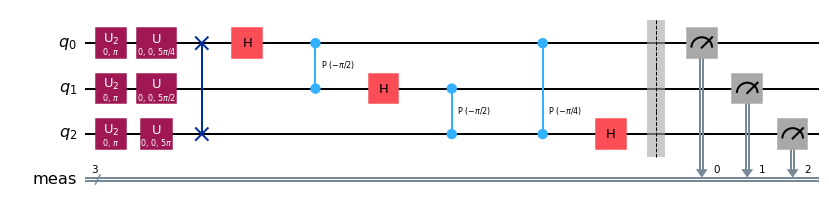

In [42]:
qc4 = inverse_qft(qc3, nqubits)
qc4.measure_all()
qc4.draw('mpl')

# QASM Simulator


Total counts are:  {'101': 1000}


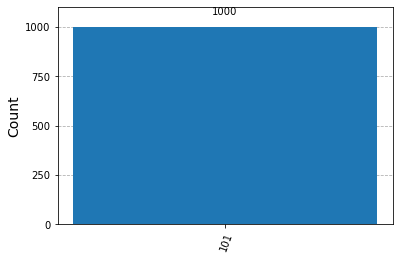

In [44]:
backend = Aer.get_backend('qasm_simulator')

histo_job = transpile(qc4, backend)

job = backend.run(histo_job, shots = 1000)

result = job.result()

counts = result.get_counts(qc4)

print("\nTotal counts are: ", counts)

plot_histogram (counts)